In [279]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

fp1 = '../data/league_2023.csv'

fp2 = '../data/league_2022.csv'

fp3 = '../data/league_2024.csv'

league23 = pd.read_csv(fp1)
league23[league23['patch'] == 13.09]

league22 = pd.read_csv(fp2)

league24 = pd.read_csv(fp3)

league22

# list(league.columns)

# neeko = league[league['champion'] == 'Neeko']

# neeko = neeko[neeko['patch'] == 13.9]


# neeko['patch'].value_counts()

# neeko


league22[league22['champion'] == 'neeko']
league22['champion'] == 'neeko'


#hi joyce


league = pd.concat([league22, league23, league24])
league.shape
# neeko = league[league['champion'] == 'Neeko']
# neeko

# neeko[neeko['gameid'] == 'ESPORTSTMNT02_2557639']

/Users/elliekwang/miniforge3/envs/dsc80/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(309456, 131)

### Step 1: Data Cleaning

In [280]:
pre_cleaning = league.copy()

In [281]:
# binary variable for missing patch
league['patch_missing'] = (league['patch'].isna()).astype(int)

# impute missing patches
patches = {
    '2022-08-11 08:37:33':12.15, 
    '2022-08-12 06:08:39':12.15, 
    '2022-08-12 07:04:40':12.15, 
    '2022-08-12 07:52:33':12.15, 
    '2022-08-12 08:51:49':12.15, 
    '2022-08-12 09:58:13':12.15, 
    '2022-08-13 06:08:31':12.15, 
    '2022-08-13 06:55:35':12.15, 
    '2022-08-13 06:08:31':12.15,
    '2022-08-13 06:55:35':12.15,
    '2022-08-13 07:47:42':12.15,
    '2023-04-05 09:17:28':13.07,
    '2023-04-05 10:18:03':13.07, 
    '2023-04-05 11:23:10':13.07,
    '2023-04-05 12:21:13':13.07,
    '2023-04-05 13:10:18':13.07,
    '2023-05-08 06:12:19':13.09,
    '2023-05-08 07:07:13':13.09,
    '2023-05-08 08:12:21':13.09,
    '2023-05-08 09:06:19':13.09,
    '2023-05-08 10:08:36':13.09,
    '2024-02-21 06:02:57':14.03,
    '2024-02-21 06:56:52':14.03, 
    '2024-02-21 07:43:27':14.03,
    '2024-02-21 08:31:33':14.03, 
    '2024-02-21 09:17:02':14.03
}
# league['patch'] = league['patch'].fillna(league['date'])
# league['patch'] = league['patch'].replace(patches)
# print(league['patch'].unique())

# # only have patch 12.10 - present
# league = league[(league['patch'] >= 12.10)]

# # filter out summary rows 
# league = league[(league['participantid'] != 100) & (league['participantid'] != 200)]

# # create a binary variable for before and after Patch 13.9
# league['post_rework'] = (league['patch'] >= 13.09).astype(int)

# # create a binary variable for whether neeko played in the game
# league['neeko'] = (league['champion'] == 'Neeko').astype(int)


In [282]:
neeko = league[league['champion'] == 'Neeko']
neeko = neeko[neeko['datacompleteness'] != 'partial']
# neeko


In [283]:
# for col in league.columns:
#     print(col)

league['firstdragon']

league['firstherald']

# firstdragon firstherald 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
34555    NaN
34556    NaN
34557    NaN
34558    1.0
34559    0.0
Name: firstherald, Length: 309456, dtype: float64

In [287]:
# league23[league23['firstherald'].notna()]


# for col in league[['gameid']].columns:
#     print(col)
# league[league['participantid']



# sum_games = league[(league['participantid'] == 100) & (league['participantid'] == 200)]
sum_games

# league[league['participantid' != 100]]


# league['participantid']


league[league['participantid' == 100]]

league['participantid'].value_counts()

KeyError: False

In [257]:
len(league['gameid'].unique())

0

In [7]:
#hypothesis test: was playing neeko after the patch random or is 
#there a significant difference what happened before and after the patch





Clearly state your null and alternative hypotheses, your choice of test statistic and significance level, the resulting 
p
-value, and your conclusion. Justify why these choices are good choices for answering the question you are trying to answer.



Question: Is there a higher proportion of games with a Neeko in it after the Patch 13.9 rework?

Null: There is no difference in proportion of games with Neeko before and after the Patch 13.9 rework.


Alternative: There is a higher proportion of games with Neeko after the Patch 13.9 rework. 


Test Statistic: Difference in Proportion, more specifically the proportion of games with Neeko after minus before the patch 13.9
- We chose difference in proportion because our data is categorical and directional.
- Our observed statistic: 0.1404526229251691

Significance Level: 0.05
- This is a standard hypothesis test. 


Result p-value: 0
- We ran 10,000 repetitions. 

Conclusion: As the p-value is 0, we reject the null hypothesis in favor of the alternative hypothesis, which is that there is a higher proportion of games with Neeko after the Patch 13.9 rework. 








In [8]:
combined = league[league['patch'] >= 12.10]
na_values = league[pd.isna(league['patch'])]

league[league['patch'] == 13.24]


na_values
# league['patch'].value_counts()

# values_na

na_values['date'].unique()
# na_values
# league.shape

na_values
league['league'].unique()

na_values['league'].unique()

# for col in league.columns:
#     print(col)

any_na_values = league.isna().any()
any_na_index = any_na_values.index[any_na_values]

# for col in any_na_values:
#     print()
any_na_index

league['teamname'].isna().sum()

54

Permutation Test: patch vs. league

State whether you believe there is a column in your dataset that is NMAR. Explain your reasoning and any additional data you might want to obtain that could explain the missingness (thereby making it MAR). Make sure to explicitly use the term “NMAR.”

We do not belive that there is a column in our dataset that is NMAR. Based on our preliminary findings when looking at the "patch" column that has missing data, we believe that the column "league", which is composed of the different leagues played in the game, could explain the missingness since we found that there were only missing patches for two leagues out of the 56.

In [9]:
league_patch = league[['league', 'patch']]
league_patch['patch_missing'] = league_patch['patch'].isna()
league_patch

/var/folders/_l/f4zhrz9s7q356_sd74v3cqmm0000gn/T/ipykernel_17954/4260375598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_patch['patch_missing'] = league_patch['patch'].isna()


,league,patch,patch_missing
0,LCKC,12.01,False
1,LCKC,12.01,False
2,LCKC,12.01,False
3,LCKC,12.01,False
4,LCKC,12.01,False
...,...,...,...
34555,CBLOLA,14.05,False
34556,CBLOLA,14.05,False
34557,CBLOLA,14.05,False
34558,CBLOLA,14.05,False


In [10]:
# obs_tvd = league_patch['patch_missing'].value_counts(normalize = True)

obs_tvd = league_patch.groupby('league')['patch_missing'].sum() / 288
# .sum().apply(lambda s: s / s.sum(), axis = 1).diff().iloc[-1].abs().sum()/2
# obs_tvd
# league_patch['league'].nunique()

In [11]:
1/56 #uniform distribution

0.017857142857142856

In [12]:
60/

SyntaxError: invalid syntax (3090718430.py, line 1)

In [13]:
def calc_tvd(data):
#     return (data
#            .groupby('patch_missing')
#            .sum()
#            .apply(lambda s: s / s.sum(), axis = 1)
#            .diff()
#            .iloc[-1]
#            .abs()
#            .sum() / 2
#            )
    return data.diff(axis = 1).iloc[: -1].abs().sum() / 2

n_reps = 500
shuffled = league_patch.copy()

tvds = []
# for _ in range(n_reps):
    
    
#     # Shuffle the leagues and store them in DataFrame
#     shuffled['patch_missing']= np.random.permutation(shuffled['patch_missing'])

    
#     # Compute and store TVD
#     tvds.append(tvd(shuffled))

# obs_tvd = calc_tvd(shuffled)

    
    
# print(obs_tvd)
    
    

In [14]:
league22['patch'].unique()
#12

array([12.01, 12.02, 12.03, 12.04, 12.05, 12.06, 12.07, 12.08, 12.09,
       12.1 , 12.11, 12.12, 12.13, 12.14, 12.15,   nan, 12.16, 12.17,
       12.18, 12.19, 12.2 , 12.21, 12.23])

In [15]:
league23['patch'].unique()
#7 before 13.09

# 14

array([13.01, 13.03, 13.04, 13.05, 13.06,   nan, 13.07, 13.08, 13.09,
       13.1 , 13.11, 13.12, 13.13, 13.14, 13.15, 13.16, 13.17, 13.18,
       13.19, 13.2 , 13.21, 13.22, 13.24])

In [16]:
league24['patch'].unique()
# 6 

array([13.24, 14.01, 14.02, 14.03,   nan, 14.04, 14.05])

### Step 4: Hypothesis Testing
Question: Is there a higher proportion of games with a Neeko in it after the Patch 13.9 rework?

Null: There is no difference in proportion of games with Neeko before and after the Patch 13.9 rework.


Alternative: There is a higher proportion of games with Neeko after the Patch 13.9 rework. 


Test Statistic: Difference in Proportion, more specifically the proportion of games with Neeko after minus before the patch 13.9
- We chose difference in proportion because our data is categorical and directional.
- Our observed statistic: 0.1404526229251691

Significance Level: 0.05
- This is a standard hypothesis test. 


Result p-value: 0
- We ran 10,000 repetitions. 

Conclusion: As the p-value is 0, we reject the null hypothesis in favor of the alternative hypothesis, which is that there is a higher proportion of games with Neeko after the Patch 13.9 rework. 

### Step 5: Framing a Prediction Problem

**Predict whether Neeko's team wins the game based on her stats at 15 minutes and her position.** We will include data from 2021 since Neeko does not change much between seasons. The time of prediction is 15 minutes into the game. 

For our predicition problem, we are performing binary classification. Our response variable is the `result` column, where the values represent whether Neeko's team won the game or not. We chose this variable because it is a interpretatble measure of success (win or loss) and aligns well with our objective of prediciting the game outcomes. 

The metric we chose for evaluating the model's performance is accuracy. Since we are performing binary classification, accuracy is a meaningful representation of overall correctness of the model's prediction, as it represents the proportion of correctly predicted outcomes. 



### Step 6: Baseline Model

**Here is a list with explanations of the columns we will be looking at for our model:**

`goldat15`: Total amount of gold accumulated by Neeko at 15 minutes.

`xpat15`: Total amount of experience points earned by Neeko at 15 minutes. 

`csat15`: Total number of minion kills by Neeko's **team** at 15 minutes. 

`golddiffat15`: Difference in gold between Neeko and the opposing team at 15 minutes. 

`xpdiffat15`: Difference in experience points between Neeko and the opposing team at 15 minutes. 

`csdiffat15`: Difference in minion kills between Neeko and the opposing team at 15 minutes. 

`killsat15`: Total number of enemy champions killed by Neeko at 15 minutes. 

`assistsat15`:	Total number of assists obtained by Neeko at 15 minutes. 

`deathsat15`: Total number of deaths of Neeko at 15 minutes. 



According to Oracle's Elixer, these values are averages.


Our baseline model is a binary classifier that predicts the outcome variable that represents whether Neeko's team wins the game or not given features recorded at 15 minutes of the game. 

For the baseline, we included only nominal features, which are one-hot encoded columns of Neeko's position and the binarized columns of the differences of gold, experience points, and the number of minions between Neeko and the opposing team. 

We one-hot encoded Neeko's position which converts the categorical variables (`bot`, `top`, `mid`, `sup`, and `jng`) into a binary format where each category is represented as a binary vector. 

Since the columns regarding differences between gold (golddiffat15), experience(xpdiffat15), or minion kills (csdiffat15) hold positive and negative values, we can transform these columns into binary features since we know that positive values mean that Neeko has an advantage compared to the opposing team, and likewise negative values suggest a disadvantage. Therefore if Neeko is ahead, the value is represented as a 1 instead of a positive value and a 0 in place of a negative value. 


We calculate the accuracy of our model using `accuracy_score`, where a high accuracy indicates that our model can effectively predict the outcome of Neeko's game based on her performance 15 minutes into the game and her position played. 

Our accuracy averages around 0.70, which in itself is sufficient given the the number of features we provided. Also, since accuracy could possibly be misleading in the presence of class imbalance, we also measured the **precision** and **recall**, which also calculate to be about the same average accuracy. Therefore, we believe that this baseline model is "good".

UMMM IDK IF THAT MAKEs SENSE because is it just neeko's stats against the entire teams? 

In [17]:
# one hot encode her position
# include features in stats_15
# run either a decision tree or a logistic regression 

In [127]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Binarizer


In [128]:
# neeko 

In [129]:
fp4 = '../data/league_2021.csv'

league21 = pd.read_csv(fp4)

league = pd.concat([league, league21])


In [142]:
neeko = league[league['champion'] == 'Neeko']
neeko = neeko[neeko['datacompleteness'] == 'complete']
for col in neeko.columns:
    print(col)

# stats_15



# goldat15
# xpat15
# # csat15 - avg
# # opp_goldat15
# # opp_xpat15
# # opp_csat15
# golddiffat15
# xpdiffat15
# csdiffat15
# killsat15
# assistsat15
# deathsat15
# # opp_killsat15
# # opp_assistsat15
# # opp_deathsat15



gameid
datacompleteness
url
league
year
split
playoffs
date
game
patch
participantid
side
position
playername
playerid
teamname
teamid
champion
ban1
ban2
ban3
ban4
ban5
pick1
pick2
pick3
pick4
pick5
gamelength
result
kills
deaths
assists
teamkills
teamdeaths
doublekills
triplekills
quadrakills
pentakills
firstblood
firstbloodkill
firstbloodassist
firstbloodvictim
team kpm
ckpm
firstdragon
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
chemtechs
hextechs
dragons (type unknown)
elders
opp_elders
firstherald
heralds
opp_heralds
void_grubs
opp_void_grubs
firstbaron
barons
opp_barons
firsttower
towers
opp_towers
firstmidtower
firsttothreetowers
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent
gspd
gpr
total cs
minionkills
monsterkills
mon

In [143]:
neeko['csat15']

16027    129.0
21038    115.0
21192    152.0
28598    112.0
33679    134.0
         ...  
60410    148.0
60715    112.0
68935    118.0
69182    140.0
70903    149.0
Name: csat15, Length: 1071, dtype: float64

In [144]:
# one hot encode her position


def one_hot(ser):
    features = pd.DataFrame()
    for val in ser.unique():
        features['one_hot_%s_%s' % (ser.name, val)] = (ser == val).astype(int)
        
    return features

def create_one_hot(df):
    # Assuming 'position' is the column you want to one-hot encode
    df_encoded = pd.concat([df, one_hot(df['position'])], axis=1)
    df_encoded.drop(columns=['position'], inplace=True)
    return df_encoded
    
    
# create_one_hot(neeko)
        
        
        

In [145]:
# Create a dataframe that has all the information we want for this prediction problem

stats_15 = ['goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']
stats_15

neeko_pred = neeko.loc[:, stats_15]
neeko_pred['position'] = neeko['position']
neeko_pred['result'] = neeko['result']
# neeko_pred = create_one_hot(neeko_pred)
# neeko_pred.shape[1]


### Feature Engineering:

**Creating Ratios:** 

- Gold Efficiency: Calculating the ratio of gold earned (`goldat15`) to the number of minion kills (`csat15`) could provide insight to how the efficieny of gold farming would influence the result of the match.

**Difference Features**
- Since the columns regarding differences between gold (`golddiffat15`), experience(`xpdiffat15`), or minion kills (`csdiffat15`) hold positive and negative values, we can transform these columns into binary features since we know that positive values mean that Neeko has an advantage compared to the opposing team, and likewise negative values suggest a disadvantage.


`goldat15`: 

In [146]:
# include features in stats_15
neeko_pred


# Creating ratio features

# neeko_pred['goldat15'].value_counts(normalize = True)

def binarize_col(df, cols):
    for col in cols:
#         new_col_name = f'binarized_{col}'
        df[col] = (df[col] > 0).astype(int)
        
#     df.drop(columns = cols, inplace = True)
    return df

# baseline_neeko = binarize_col(neeko_pred, ['golddiffat15', 'xpdiffat15','csdiffat15'])
# baseline_neeko
    

In [147]:
neeko_pred

,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,position,result
16027,5689.0,7053.0,129.0,381.0,97.0,3.0,1.0,3.0,0.0,mid,1
21038,5621.0,7726.0,115.0,-919.0,336.0,-21.0,4.0,1.0,2.0,mid,0
21192,6491.0,7909.0,152.0,2273.0,685.0,54.0,0.0,0.0,0.0,top,1
28598,7161.0,6131.0,112.0,2069.0,713.0,28.0,4.0,9.0,1.0,mid,1
33679,4812.0,7223.0,134.0,169.0,396.0,15.0,0.0,0.0,0.0,mid,1
...,...,...,...,...,...,...,...,...,...,...,...
60410,5712.0,7933.0,148.0,1088.0,834.0,39.0,1.0,0.0,0.0,mid,0
60715,5591.0,7161.0,112.0,-2179.0,-1110.0,-35.0,2.0,1.0,3.0,mid,0
68935,4993.0,6751.0,118.0,-807.0,-571.0,7.0,1.0,0.0,1.0,mid,0
69182,5233.0,7486.0,140.0,-781.0,634.0,12.0,1.0,0.0,1.0,mid,0


### Baseline Model

We created a binary classification model that trained the data using the Logisitic Regression model. 

In [189]:
# labels = pd.Series(baseline_neeko["result"]).value_counts(normalize=True)
# labels

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming neeko_pred is your DataFrame
features = neeko_pred.drop(columns=['result'])  # Selecting features
target = neeko_pred['result']  # Selecting target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the ColumnTransformer to one-hot encode the 'position' column
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['position']),  # One-hot encode the 'position' column
], remainder='passthrough')

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', LogisticRegression(max_iter = 10000))  # You can replace this with any classifier you want to use
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5441860465116279


### Step 7: Final Model

In [219]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, Binarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


def multi_type_pipeline():
    features = neeko_pred.drop(columns=['result'])  # Selecting features
    target = neeko_pred['result']  # Selecting target variable

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    ct = ColumnTransformer([
        ('onehot', OneHotEncoder(), ['position']),  # One-hot encode the 'position' column
#         ('binarize', Binarizer(threshold=0), ['golddiffat15', 'xpdiffat15', 'csdiffat15']),
        ('scaling', StandardScaler(), ['goldat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15','xpat15', 'csat15', 'killsat15', 'assistsat15', 'deathsat15'])
    ], remainder='drop')

    pl = Pipeline([
        ('preprocessor', ct),
        ('classifier', LogisticRegression(max_iter = 10000))  # You can replace this with any classifier you want to use
    ])

    pl.fit(X_train, y_train)

    accuracy = pl.score(X_test, y_test)
    print("Accuracy:", accuracy)
    
    y_pred = pl.predict(X_test)
    return metrics.confusion_matrix(y_test, y_pred)


multi_type_pipeline()

Accuracy: 0.6558139534883721


array([[57, 41],
       [33, 84]])

In [121]:
# X_train, X_test, y_train, y_test = train_test_split(baseline_neeko, labels)
# clf = LogisticRegression(max_iter=10000)
# clf.fit(X_train, y_train)


# clf.predict(X_test)


In [123]:
#

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


# Select features and target variable


features = baseline_neeko[['golddiffat15', 'xpdiffat15', 'csdiffat15',
               'one_hot_position_bot', 'one_hot_position_top', 'one_hot_position_mid', 
               'one_hot_position_sup', 'one_hot_position_jng']]
target = baseline_neeko['result']  # Assuming 'result' is the column indicating the game result

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)#, random_state=52)

# print(X_train)

# Train the Logistic Regression model
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

# print(model)
# Making predictions on the testing data
y_pred = model.predict(X_test)


print(predictions)

pred = pd.Series(y_pred).value_counts(normalize=True)
print(pred)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


metrics.confusion_matrix(y_test, y_pred)


# print(predictions.accuracy_score(y_test, y_pred))


[1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 1]
1    0.530928
0    0.469072
dtype: float64
Accuracy: 0.6391752577319587


array([[55, 34],
       [36, 69]])

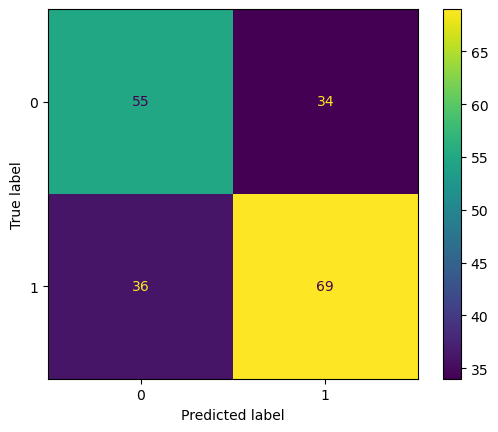

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [160]:
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);
# plt.grid(False)

In [161]:
metrics.accuracy_score(y_test, y_pred)

0.6391752577319587

In [162]:
metrics.precision_score(y_test, y_pred)

0.6699029126213593

In [163]:
metrics.recall_score(y_test, y_pred)

0.6571428571428571